# E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

## 1. Load libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load Data

In [54]:
df = pd.read_csv('Customer_Behavior_Data.csv',sep=';')
df.sample(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
2654,66,510,4043592,no,no,0,208,35,17,85,197,112,"261,7",83,"11,78","6,8",3,"1,84",1,0
2228,80,510,3314807,no,no,0,204,35,18,92,216,97,"154,2",66,"6,94","7,6",5,"2,05",2,0
136,75,415,3748525,no,yes,21,176,30,18,97,218,106,"237,5",134,"10,69","5,3",4,"1,43",5,0
1045,217,408,3857082,no,no,0,176,30,14,115,159,128,"306,6",107,"13,8","9,3",3,"2,51",4,0
156,83,415,3709116,no,no,0,337,57,19,120,227,116,"153,9",114,"6,93","15,8",7,"4,27",0,1


## EDA

With every new dataset we need to got throuhg an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to: 

- Understand what our columns say
- Rename columns labels and make them lowercase
- Make sure that the data types of columns are correct
- Handle missing values
- Check for duplicates
- Search for outliers
- Check for linearity between variables

To achieve this we can take advantage of Pandas and visualisation libraries

## Editing Column Name and Row Values

* Some columns are seprated by space bar, they will be replaced with underscores to make the data cleaner - especially when dealing with code that doens't handle spaces well. 

In [55]:
df.columns = df.columns.str.lower().str.replace(' ','_')

## Changing to the Appropriate Data Type

* Some  decimal values are separatted with a comma (,) instead of a dot (.). The code below adjusts those values accordingly. 

In [56]:
df['avg_order_value'] = df['avg_order_value'].apply(lambda x: x.replace(",",'.'))
df['discount_rate_per_visited_products'] = df['discount_rate_per_visited_products'].apply(lambda x: x.replace(",",'.'))
df['product_detail_view_per_app_session'] = df['product_detail_view_per_app_session'].apply(lambda x: x.replace(",",'.'))
df['add_to_cart_per_session'] = df['add_to_cart_per_session'].apply(lambda x: x.replace(",",'.'))

* Some columns were imported with the wrong data type. The code below converts them to their appriopriate data type

In [57]:
df['location_code'] = df['location_code'].astype(str)
df['user_id'] = df['user_id'].astype(str)
df['avg_order_value'] = df['avg_order_value'].astype(float)
df['discount_rate_per_visited_products'] = df['discount_rate_per_visited_products'].astype(float)
df['product_detail_view_per_app_session'] = df['product_detail_view_per_app_session'].astype(float)
df['add_to_cart_per_session'] = df['add_to_cart_per_session'].astype(float)
df['churn'] = df['churn'].astype('str')

## Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function. 

## 3. Handle Missing Values

Missing values can be an issue with most real-life datasets. We can use the .info() function, there are no missing values. For the sake of double checking and to show a way of checking whether the dataset has missing values, let's write some code below

* .info() shows there are no missing values because RangeIndex has 3333 entries and all entries are non-null

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   object 
 2   user_id                              3333 non-null   object 
 3   credit_card_info_save                3333 non-null   object 
 4   push_status                          3333 non-null   object 
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

* The results below shows that there are no missing values

In [59]:
df.isna().sum()

account_length                         0
location_code                          0
user_id                                0
credit_card_info_save                  0
push_status                            0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
avg_order_value                        0
sale_product_views                     0
discount_rate_per_visited_products     0
product_detail_view_per_app_session    0
app_transactions                       0
add_to_cart_per_session                0
customer_service_calls                 0
churn                                  0
dtype: int64

In [60]:
df.describe()

,account_length,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 4. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

* After checking for duplicates, none were found

In [61]:
duplicates = len(df[df.duplicated() == True])

print(f'There are {duplicates} rows in the dataset')# NO duplicated values

There are 0 rows in the dataset


## 5. Search for outliers

- Outliers are data points at the extreme points of a dataset. 
- Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
    - Because of this, we need to be careful when we cleanse our data
    - If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
    - If the outliers are errors we should generally remove those data points
    
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use: 
- Visualisations such as histograms and box plots 
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

## After removing outliers

### 6. Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers

## Checking for Outliers using Histograms and Box Plots

In [62]:
outliers = df[['session_duration','avg_order_value','promotion_clicks','sale_product_views','app_transactions','account_length','add_to_wishlist','desktop_sessions','customer_service_calls']]

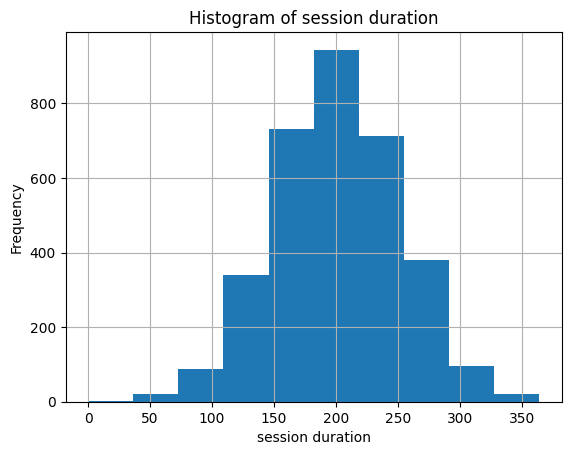

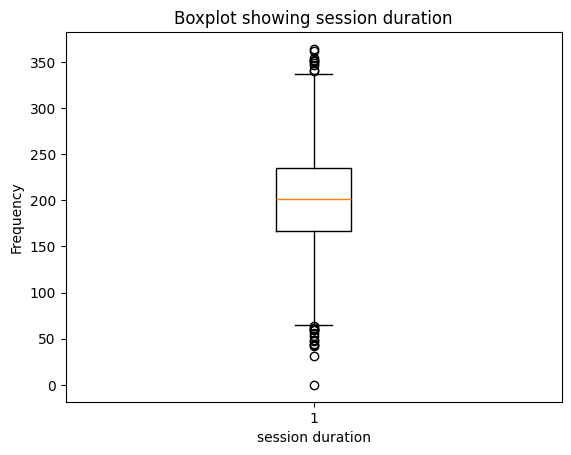

------------------------------------------------------------------------------


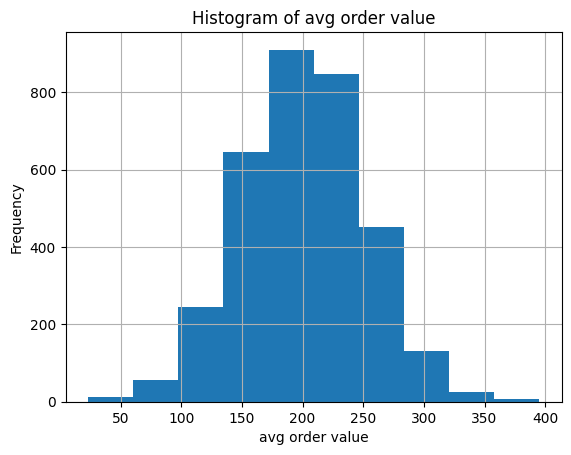

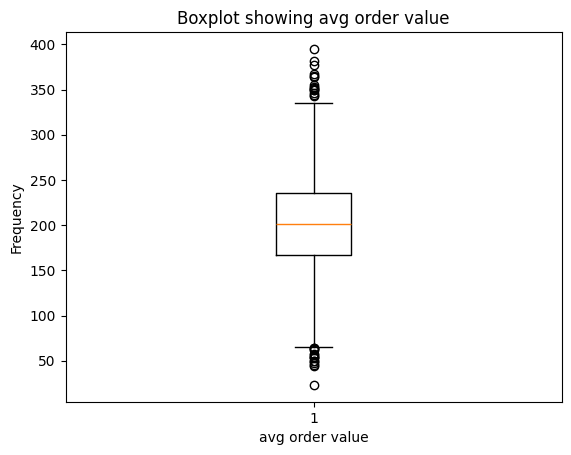

------------------------------------------------------------------------------


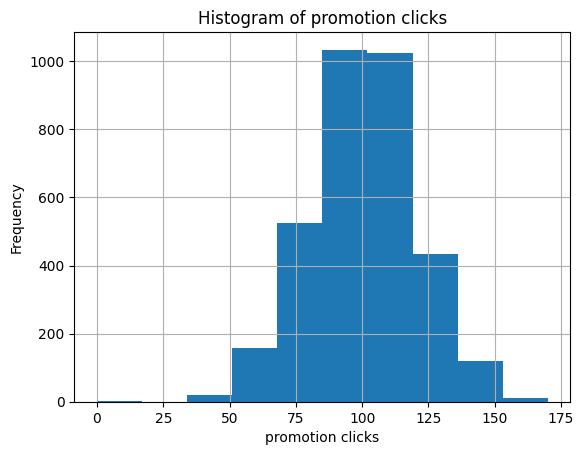

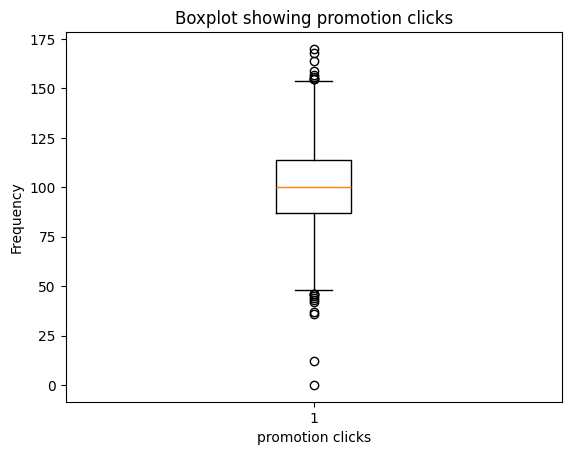

------------------------------------------------------------------------------


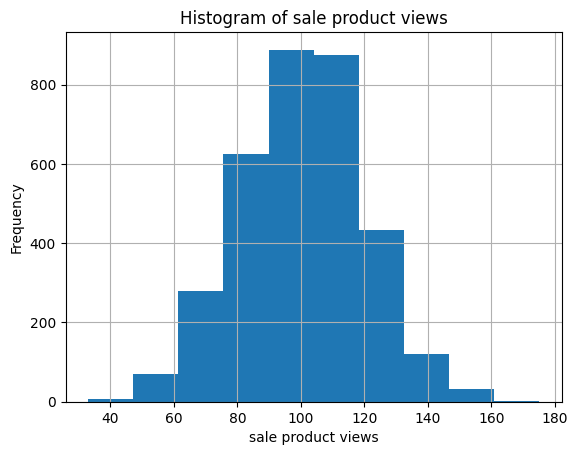

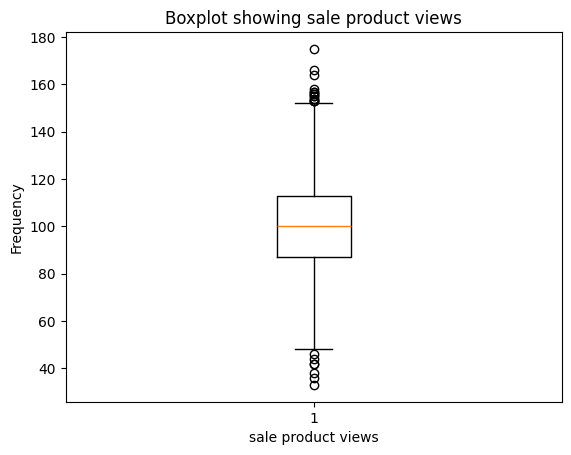

------------------------------------------------------------------------------


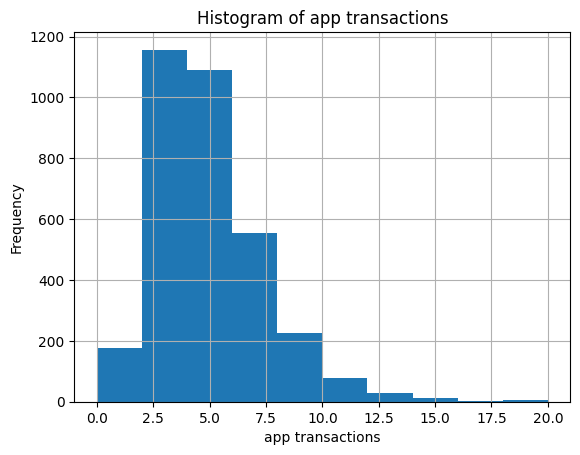

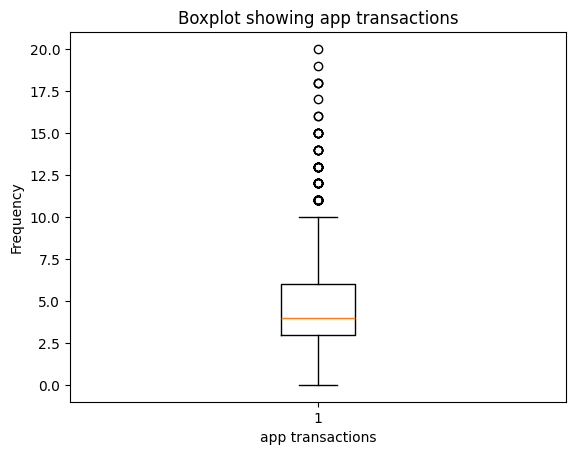

------------------------------------------------------------------------------


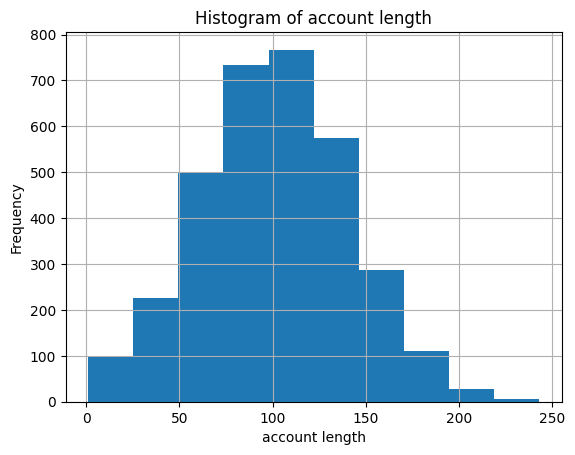

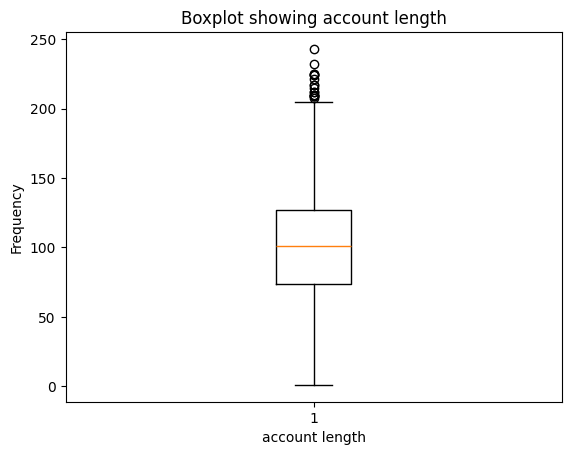

------------------------------------------------------------------------------


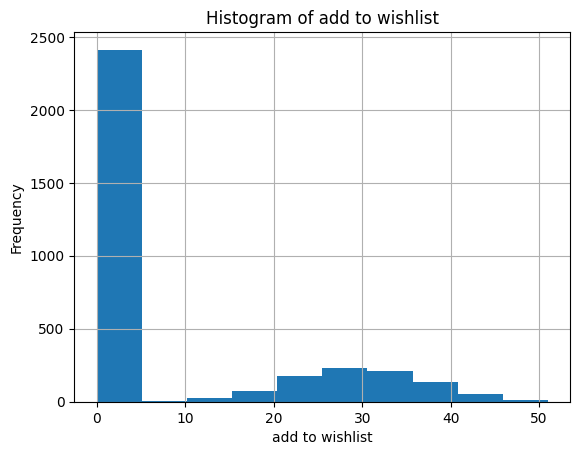

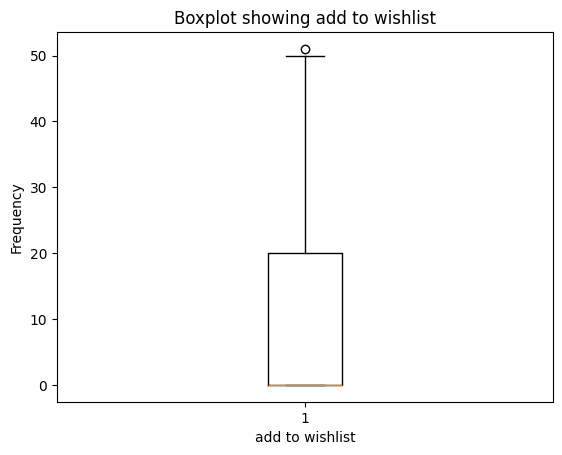

------------------------------------------------------------------------------


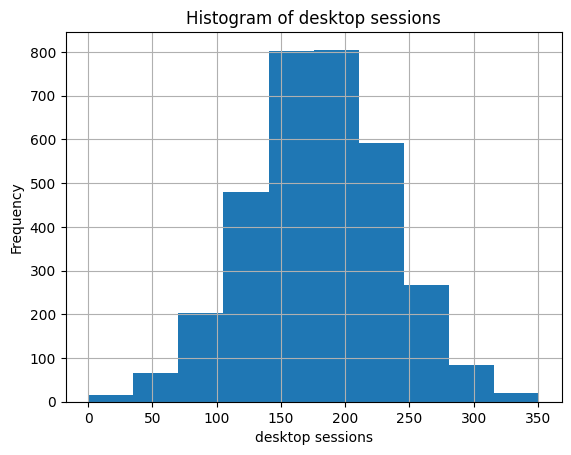

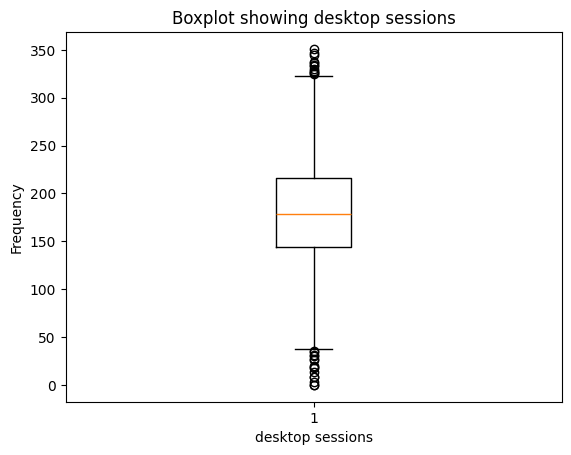

------------------------------------------------------------------------------


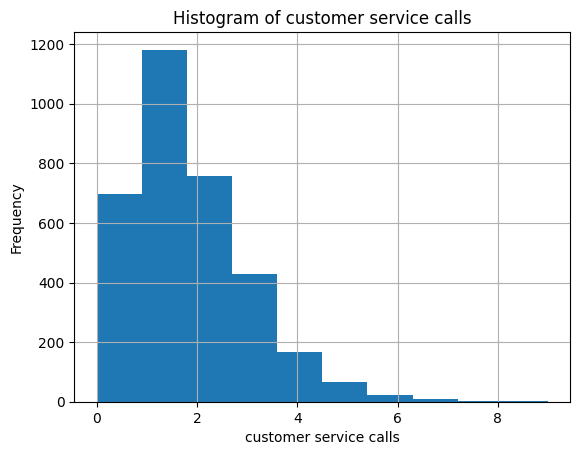

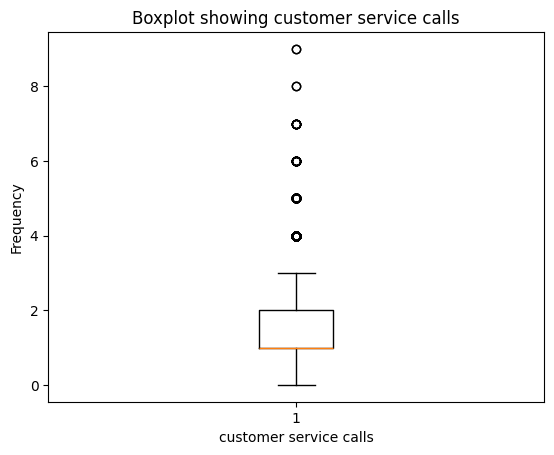

------------------------------------------------------------------------------


In [63]:
for col in outliers.columns:
    outliers[col].hist()
    plt.title(f'Histogram of {col.replace('_',' ')}')
    plt.ylabel('Frequency')
    plt.xlabel(f'{col.replace('_',' ')}')
    plt.show()
    plt.boxplot(df[col])
    plt.title(f'Boxplot showing {col.replace('_',' ')}')
    plt.ylabel('Frequency')
    plt.xlabel(f'{col.replace('_',' ')}')
    plt.show()
    print('------------------------------------------------------------------------------')

# 7. Conclusions based on visualisations

- All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers **"True outliers"**.
- If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean (example code below if you need to use it)

# 8. Analysis of the Dependent variable (Churn) vs Independent variables

Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka independent variables in our dataset can help us predict customers deciding to stop using the product, aka "churn".

Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

# 9. Plot Churn against the categorical data

# 9.1 Observations from the categorical columns plots

- Majority of customers are in location code 415
- Majority of customers don't allow push notifications
- Majority of customers don't store their credit card information on the side

# 9.2 Plot categorical data against the Churn

* Let's identify the categorical columns

In [64]:
df.select_dtypes('object').sample(2)

,location_code,user_id,credit_card_info_save,push_status,churn
1706,415,4086302,no,no,0
2012,408,3829447,no,no,0


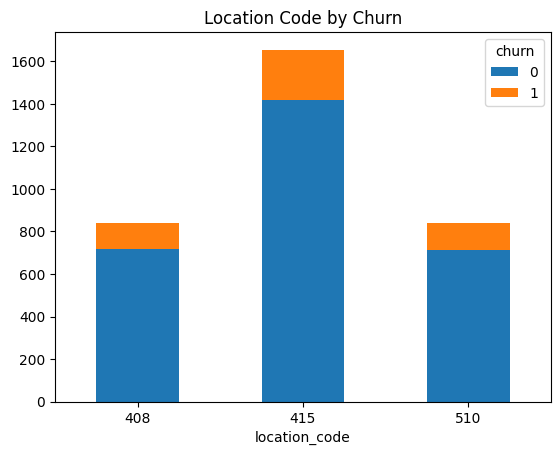

In [65]:
location_churn = df.groupby(['location_code','churn']).size().unstack()
location_churn.plot(kind='bar',stacked=True)
plt.title('Location Code by Churn')
plt.xticks(rotation=0)
plt.show()

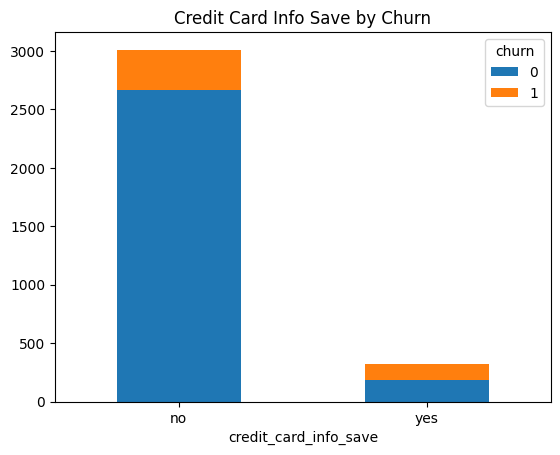

In [67]:
credit_card_vs_churn = df.groupby(['credit_card_info_save','churn']).size().unstack()
credit_card_vs_churn.plot(kind='bar',stacked=True)
plt.title('Credit Card Info Save by Churn')
plt.xticks(rotation=0)
plt.show()

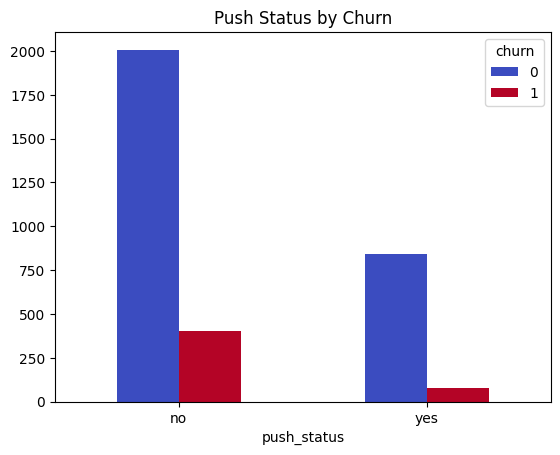

In [68]:
push_vs_churn = df.groupby(['push_status','churn']).size().unstack()
push_vs_churn.plot(kind='bar',colormap='coolwarm')
plt.title('Push Status by Churn')
plt.xticks(rotation=0)
plt.show()

# 9.3 Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns. 
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.

In [83]:
credit_card_vs_churn

churn,0,1
credit_card_info_save,,
no,2664,346
yes,186,137


In [89]:
print(f'{round((346/3010),2)}% of customers who didnt give credit card info churned')#()
print(f'{round((137/323),2)}% of customers who gave credit card info churned')#()

0.11% of customers who didnt give credit card info churned
0.42% of customers who gave credit card info churned


# credit card